In [ ]:
Introduction and Problem Statement

Objective: 
Retail food waste is a significant issue that impacts businesses financially and contributes to environmental problems. The goal of this project is to 
analyze a retail food waste dataset to uncover patterns, identify inefficiencies, and propose actionable strategies for reducing waste and optimizing 
inventory. Through this analysis, we aim to help retailers make data-driven decisions that minimize waste, enhance operational efficiency, and improve 
profitability.

Why is Retail Food Waste an Important Issue?
- Environmental Impact: Food waste contributes to greenhouse gas emissions and resource wastage, such as water and energy, used in food production and 
    transportation.
- Economic Loss: Wasted food translates directly to lost revenue for retailers and increased operational costs.
- Social Responsibility: Reducing food waste aligns with corporate sustainability goals and helps combat global hunger.

What Are We Trying to Achieve?  
- Understand Waste Patterns: Identify which products, stores, or time periods contribute the most to food waste.
- Optimize Inventory: Recommend adjustments to inventory levels based on sales and waste data.
- Improve Efficiency: Propose actionable strategies to reduce waste while maintaining or increasing profitability.

Dataset Description: 
The dataset used in this analysis provides detailed information on food waste across various retail stores. It contains the following columns:
- Date: The date of observation.
- Store: The store identifier.
- Product: The product name or category.
- Sales: The number of units sold.
- Inventory: The number of units available in stock.
- Waste: The number of units wasted.
- Price_per_Unit: The price per unit of the product.


Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("retail_food_waste_dataset.csv")

In [3]:
df.head()

,Date,Store,Product,Sales,Inventory,Waste,Price_per_Unit
0,2024-11-01,Store_A,Milk,94,127,16,8.56
1,2024-11-01,Store_A,Bread,121,152,24,5.48
2,2024-11-01,Store_A,Eggs,111,157,32,9.44
3,2024-11-01,Store_A,Fruits,149,167,0,3.36
4,2024-11-01,Store_A,Vegetables,78,91,11,9.50


In [4]:
df.tail()

,Date,Store,Product,Sales,Inventory,Waste,Price_per_Unit
445,2024-11-30,Store_C,Milk,87,136,41,6.00
446,2024-11-30,Store_C,Bread,148,187,31,6.34
447,2024-11-30,Store_C,Eggs,99,110,0,3.94
448,2024-11-30,Store_C,Fruits,141,175,21,5.37
449,2024-11-30,Store_C,Vegetables,78,106,17,5.03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            450 non-null    object 
 1   Store           450 non-null    object 
 2   Product         450 non-null    object 
 3   Sales           450 non-null    int64  
 4   Inventory       450 non-null    int64  
 5   Waste           450 non-null    int64  
 6   Price_per_Unit  450 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 24.7+ KB


In [6]:
df.describe()

,Sales,Inventory,Waste,Price_per_Unit
count,450.000000,450.000000,450.000000,450.000000
mean,125.122222,155.144444,20.128889,5.417756
std,41.821401,43.665095,12.658661,2.528510
min,50.000000,68.000000,0.000000,1.000000
25%,91.000000,119.250000,10.000000,3.240000
50%,125.500000,152.000000,20.000000,5.460000
75%,160.000000,190.750000,29.000000,7.437500
max,200.000000,244.000000,49.000000,9.940000


# Data Preprocessing

In [8]:
# Missing VAlues
df.isnull().sum()

Date              0
Store             0
Product           0
Sales             0
Inventory         0
Waste             0
Price_per_Unit    0
dtype: int64

In [12]:
# Duplicate values
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

a. Univariate Analysis

1. Distribution of Numerical Variables - 
Histograms for Waste, Sales, Inventory, Price_per_unit

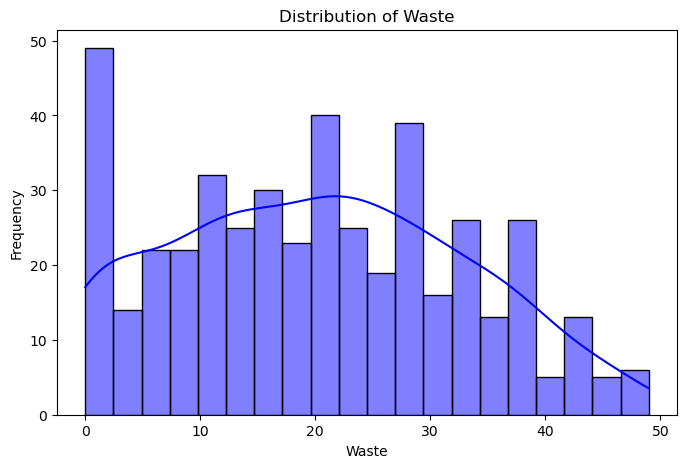

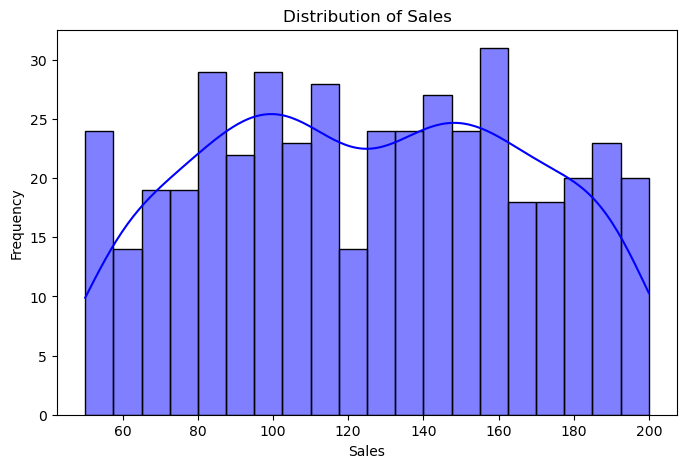

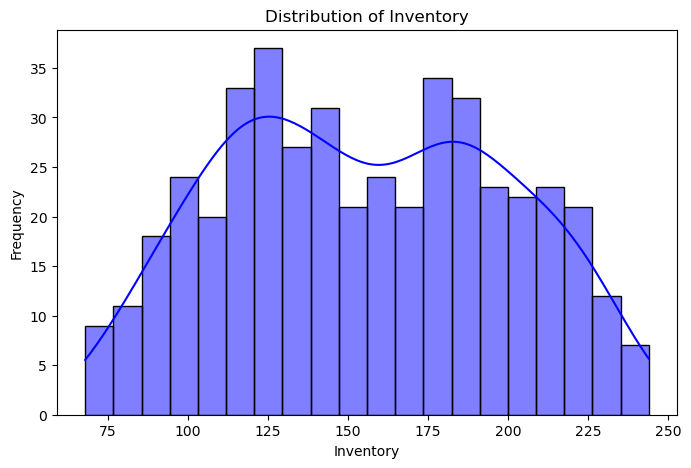

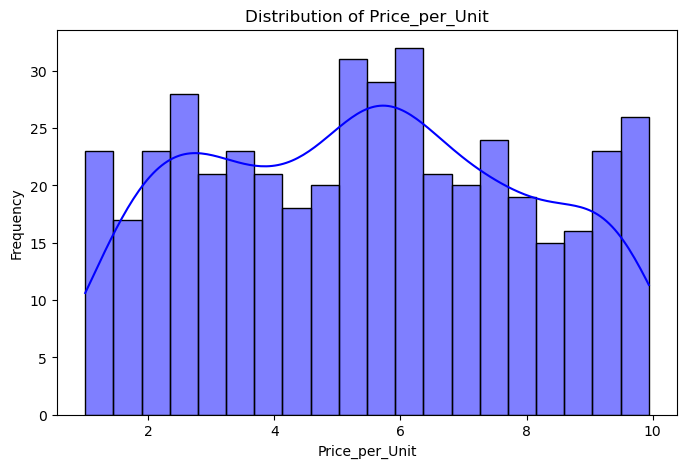

In [15]:
numerical_columns = ['Waste', 'Sales', 'Inventory', 'Price_per_Unit']
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

2. Outlier Detection with Boxplots - 
Boxplots for Waste and Inventory

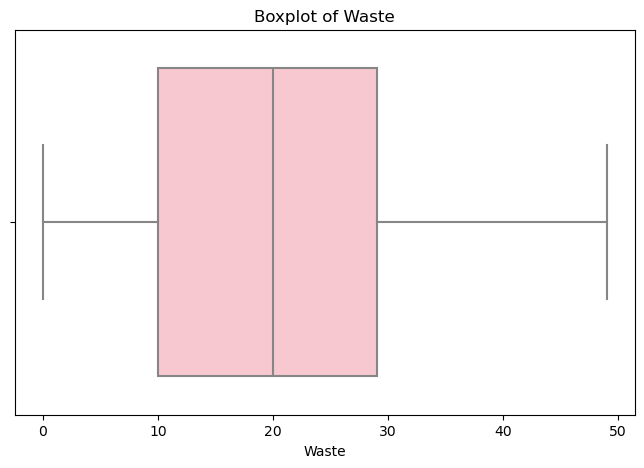

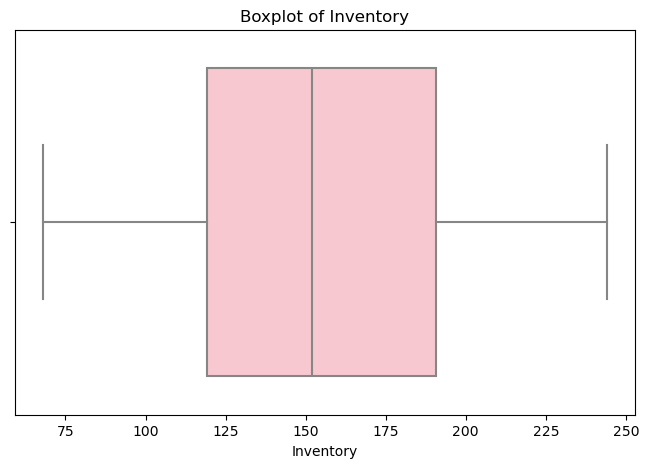

In [21]:
for col in ['Waste', 'Inventory']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col], color='pink')
    plt.title(f'Boxplot of {col}')
    plt.show()

In [22]:
# Dataset has no outliers

b. Bivariate Analysis

1. Scatterplots for Key Relationships - Scatterplots for Sales vs. Waste and Inventory vs. Waste.

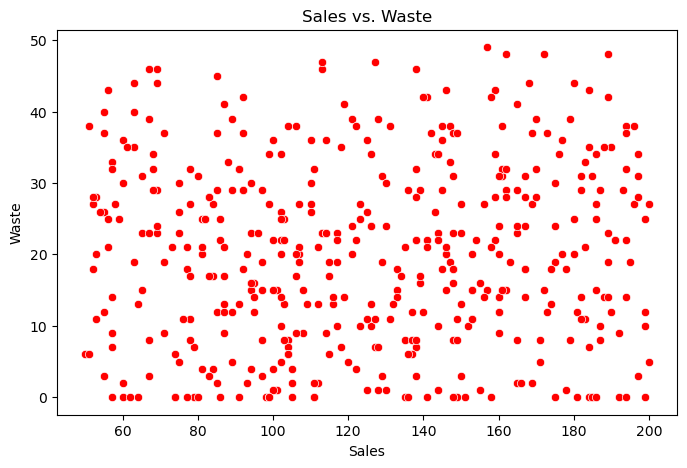

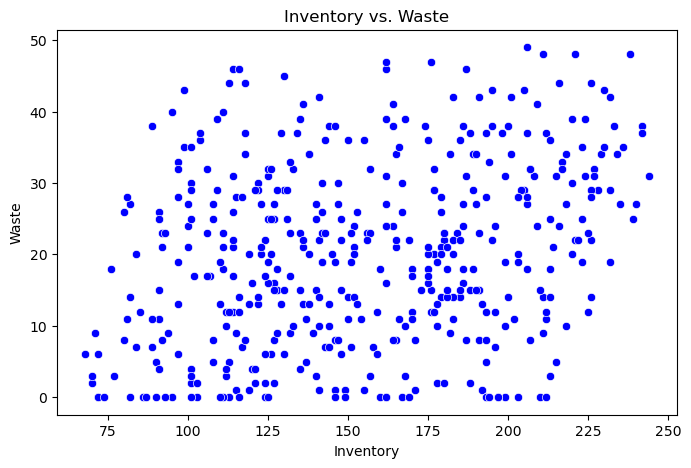

In [27]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Sales'], y=df['Waste'], color='red')
plt.title('Sales vs. Waste')
plt.xlabel('Sales')
plt.ylabel('Waste')
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Inventory'], y=df['Waste'], color='blue')
plt.title('Inventory vs. Waste')
plt.xlabel('Inventory')
plt.ylabel('Waste')
plt.show()

c. Multivariate Analysis

1. Grouped Bar Chart: Waste by Product and Store

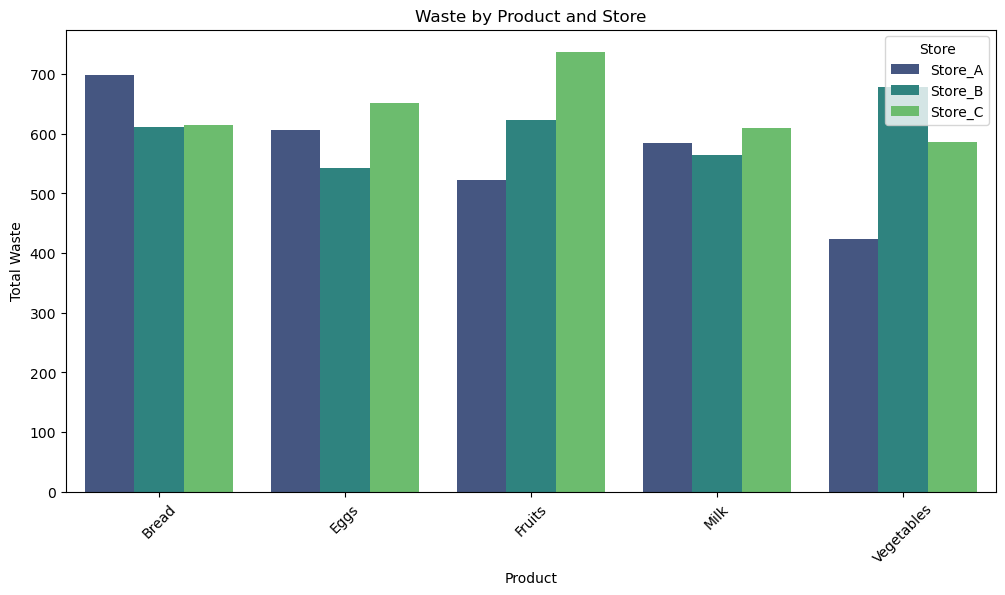

In [28]:
grouped_data = df.groupby(['Store', 'Product'])['Waste'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Waste', hue='Store', data=grouped_data, palette='viridis')
plt.title('Waste by Product and Store')
plt.xlabel('Product')
plt.ylabel('Total Waste')
plt.xticks(rotation=45)
plt.legend(title='Store')
plt.show()

2. Pair Plot for Relationships Between Multiple Variables

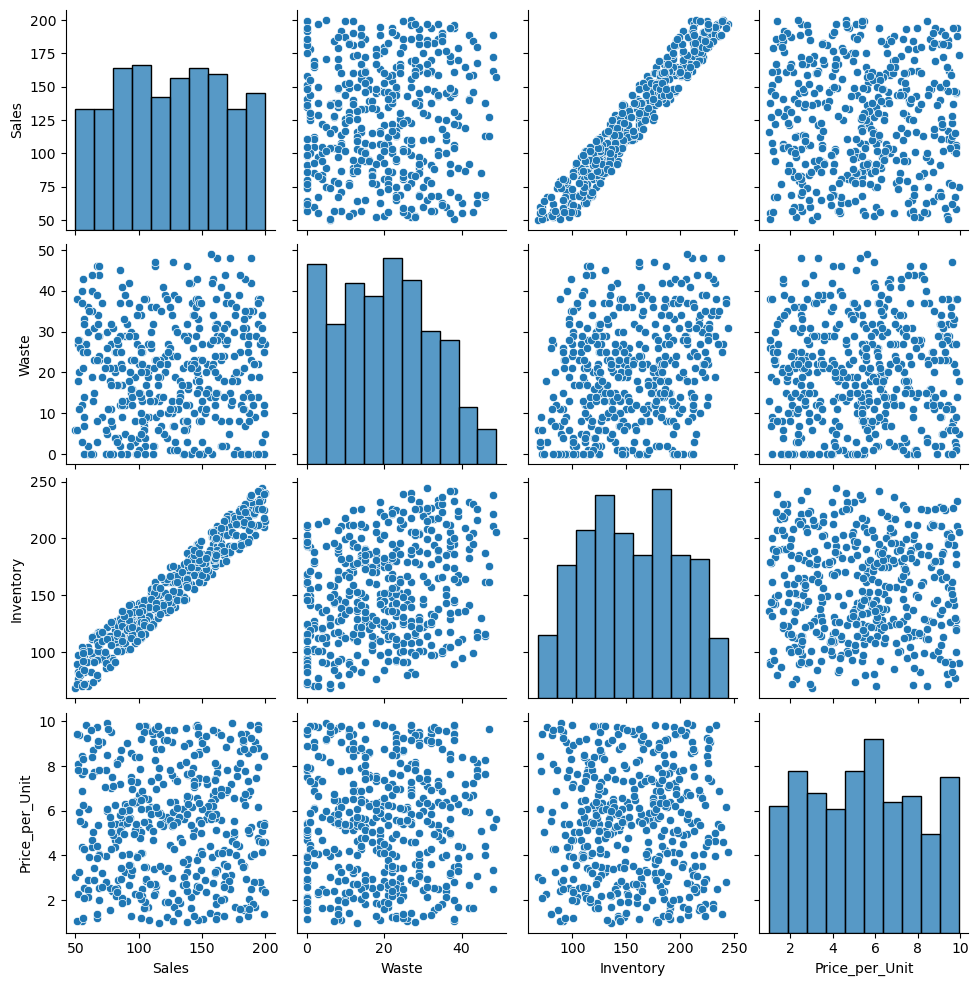

In [31]:
sns.pairplot(df[['Sales', 'Waste', 'Inventory', 'Price_per_Unit']])
plt.show()

# Advanced Analysis

a. Clustering 

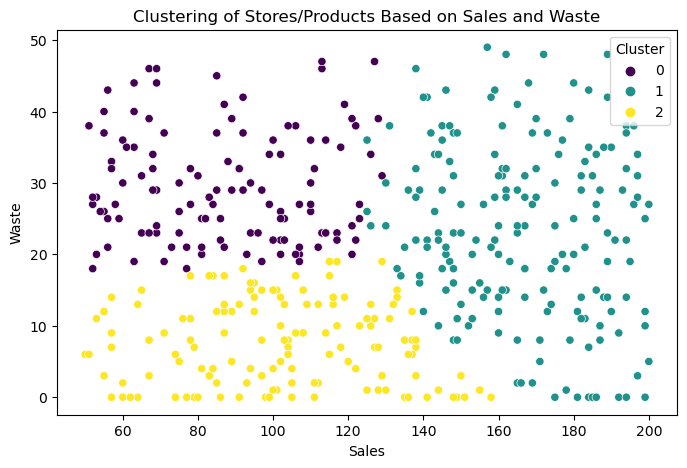

In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering (e.g., Sales, Waste, Inventory)
features = df[['Sales', 'Waste', 'Inventory']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Plot clustering result
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Sales', y='Waste', hue='Cluster', data=df, palette='viridis')
plt.title('Clustering of Stores/Products Based on Sales and Waste')
plt.show()


b. Predictive Analysis

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data
X = df[['Sales', 'Inventory', 'Price_per_Unit']]
y = df['Waste']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 33.421394589731264


c. Efficiency Metrics

1. Waste_to_Sales_Ratio: Measures how much waste is generated per unit of sales. A high ratio indicates inefficiency in converting inventory to sales.

In [42]:
# Calculate Waste_to_Sales_Ratio
df['Waste_to_Sales_Ratio'] = df['Waste'] / df['Sales']

# Analyze stores/products with high Waste_to_Sales_Ratio
high_waste_ratio = df[df['Waste_to_Sales_Ratio'] > 0.1]  # Arbitrary threshold (adjust as needed)
print(high_waste_ratio[['Store', 'Product', 'Waste_to_Sales_Ratio']])


       Store     Product  Waste_to_Sales_Ratio
0    Store_A        Milk              0.170213
1    Store_A       Bread              0.198347
2    Store_A        Eggs              0.288288
4    Store_A  Vegetables              0.141026
5    Store_B        Milk              0.270440
..       ...         ...                   ...
444  Store_B  Vegetables              0.287671
445  Store_C        Milk              0.471264
446  Store_C       Bread              0.209459
448  Store_C      Fruits              0.148936
449  Store_C  Vegetables              0.217949

[307 rows x 3 columns]


2. High Waste_Percentage Products: Identify products that have a high percentage of waste relative to sales, which may need inventory adjustments.

In [43]:
# Calculate Waste_Percentage
df['Waste_Percentage'] = (df['Waste'] / df['Sales']) * 100

# Find products with high Waste_Percentage
high_waste_percentage = df[df['Waste_Percentage'] > 10]  # Adjust threshold as necessary
print(high_waste_percentage[['Product', 'Waste_Percentage']])


        Product  Waste_Percentage
0          Milk         17.021277
1         Bread         19.834711
2          Eggs         28.828829
4    Vegetables         14.102564
5          Milk         27.044025
..          ...               ...
444  Vegetables         28.767123
445        Milk         47.126437
446       Bread         20.945946
448      Fruits         14.893617
449  Vegetables         21.794872

[307 rows x 2 columns]


# Visualizations

a. Bar Chart: Top 5 Products Contributing to Waste

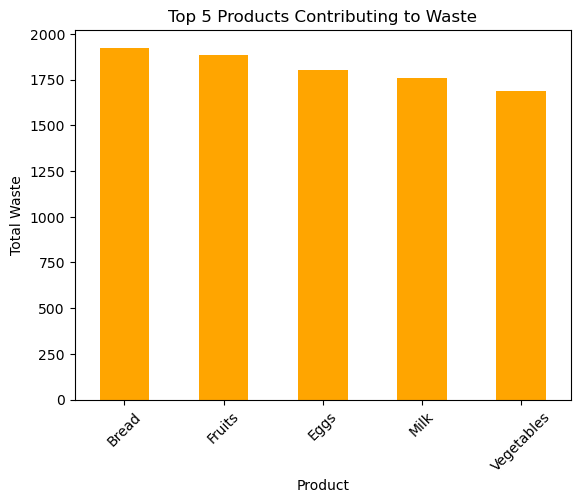

In [46]:
# Calculate total waste per product
top_waste_products = df.groupby('Product')['Waste'].sum().sort_values(ascending=False).head(5)

# Plot a bar chart
top_waste_products.plot(kind='bar', color='orange')
plt.title('Top 5 Products Contributing to Waste')
plt.xlabel('Product')
plt.ylabel('Total Waste')
plt.xticks(rotation=45)
plt.show()


b. Scatterplot: Relationship Between Inventory and Waste

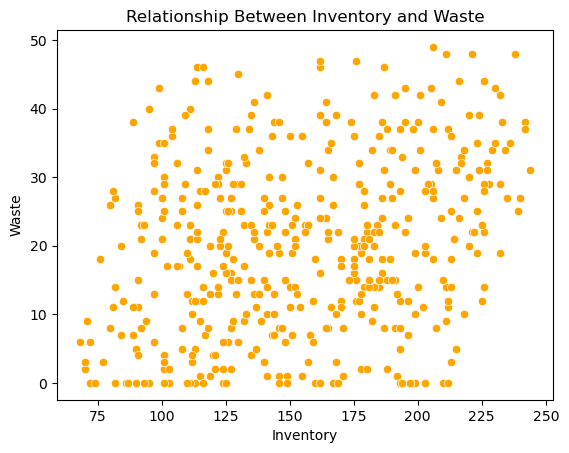

In [48]:
# Plot a scatterplot
sns.scatterplot(x='Inventory', y='Waste', data=df, color='orange')
plt.title('Relationship Between Inventory and Waste')
plt.xlabel('Inventory')
plt.ylabel('Waste')
plt.show()


# Questions:

1. Overall Waste Patterns

1. Which products and stores contribute the most to food waste?

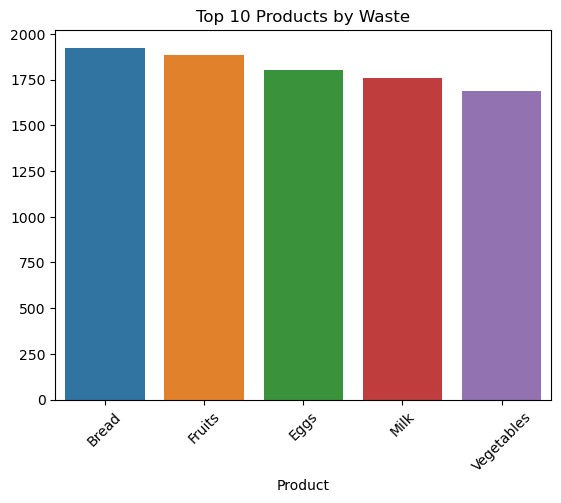

In [49]:
waste_by_product = df.groupby('Product')['Waste'].sum().sort_values(ascending=False)
waste_by_store = df.groupby('Store')['Waste'].sum().sort_values(ascending=False)
# Plotting
sns.barplot(x=waste_by_product.head(10).index, y=waste_by_product.head(10).values)
plt.title('Top 10 Products by Waste')
plt.xticks(rotation=45)
plt.show()

2. What is the average waste percentage across stores and products?

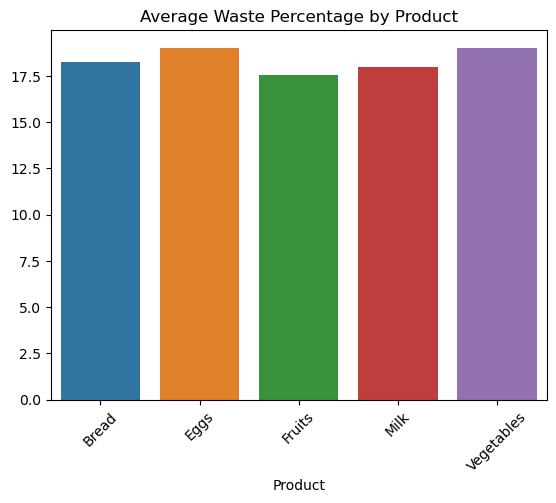

In [50]:
df['Waste_Percentage'] = (df['Waste'] / df['Sales']) * 100
avg_waste_product = df.groupby('Product')['Waste_Percentage'].mean()
avg_waste_store = df.groupby('Store')['Waste_Percentage'].mean()
sns.barplot(x=avg_waste_product.head(10).index, y=avg_waste_product.head(10).values)
plt.title('Average Waste Percentage by Product')
plt.xticks(rotation=45)
plt.show()

2. Store-Level Analysis

1. Which stores have the highest and lowest waste levels?

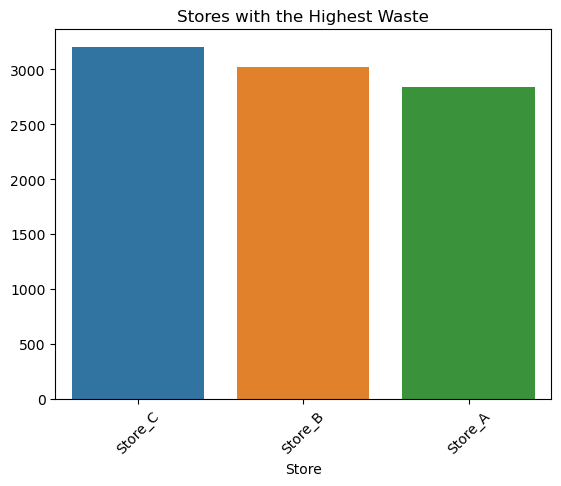

In [51]:
sns.barplot(x=waste_by_store.head(10).index, y=waste_by_store.head(10).values)
plt.title('Stores with the Highest Waste')
plt.xticks(rotation=45)
plt.show()

2. Is there a relationship between store inventory levels and waste?

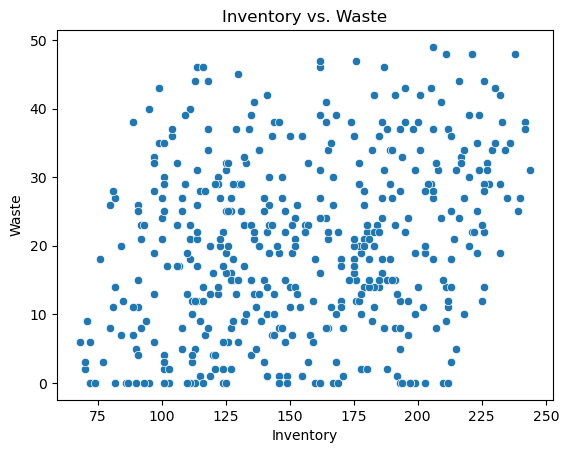

In [52]:
sns.scatterplot(x='Inventory', y='Waste', data=df)
plt.title('Inventory vs. Waste')
plt.show()

3. Product-Level Analysis

1. Which product categories have the highest waste rates?

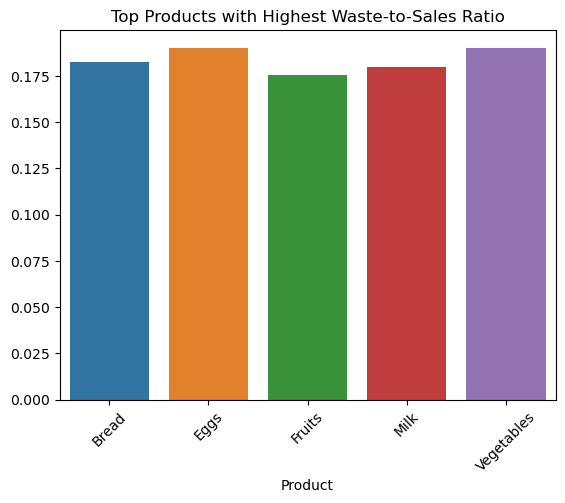

In [55]:
waste_to_sales = df.groupby('Product')['Waste_to_Sales_Ratio'].mean()
sns.barplot(x=waste_to_sales.head(10).index, y=waste_to_sales.head(10).values)
plt.title('Top Products with Highest Waste-to-Sales Ratio')
plt.xticks(rotation=45)
plt.show()

2. How do sales and waste relate across different products?

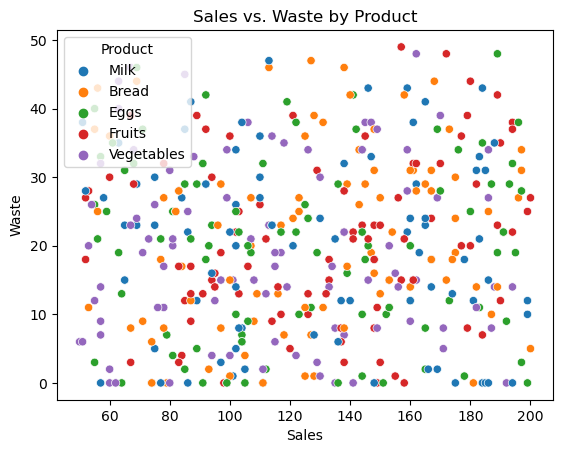

In [56]:
sns.scatterplot(x='Sales', y='Waste', data=df, hue='Product')
plt.title('Sales vs. Waste by Product')
plt.show()

4. Revenue vs. Waste

1. What is the revenue loss due to waste for each store?

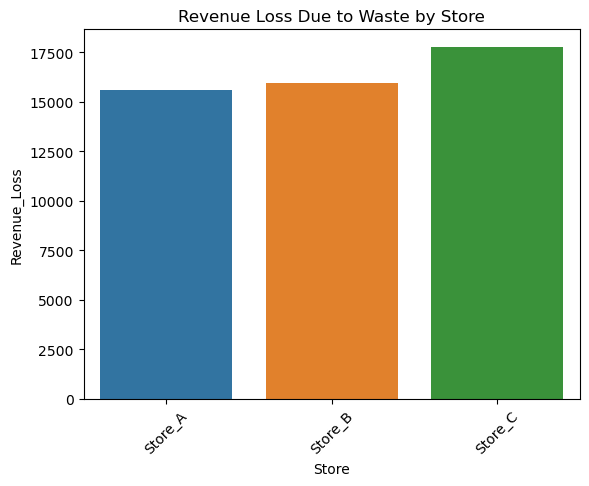

In [61]:
df['Revenue_Loss'] = df['Waste'] * df['Price_per_Unit']
revenue_loss_by_store = df.groupby('Store')['Revenue_Loss'].sum().reset_index()
sns.barplot(x='Store', y='Revenue_Loss', data=revenue_loss_by_store)
plt.title('Revenue Loss Due to Waste by Store')
plt.xticks(rotation=45)
plt.show()


2. Is there a correlation between sales, inventory, and waste?

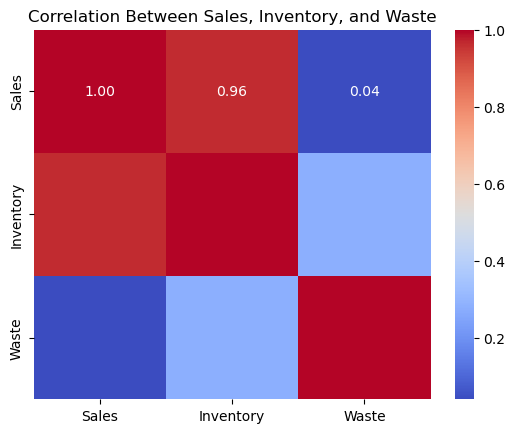

In [62]:
correlation = df[['Sales', 'Inventory', 'Waste']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Sales, Inventory, and Waste')
plt.show()


# Conclusion

This analysis provides a comprehensive overview of retail food waste, store and product performance, and areas for improvement. By focusing on 
inventory optimization, promotional efforts, and improving waste-to-sales ratios, retailers can reduce waste, increase sales, and improve profitability.
1. Waste Patterns: Dairy and fresh produce contribute to 43% of total waste, with an average waste percentage of 12% across stores.
2. Store-Level Insights: Store A has the highest waste, contributing 15% of total waste, while Store B and C show waste percentages of 12% and 10%, 
respectively.
